In [91]:
import numpy as np
from sklearn.datasets import load_boston

In [92]:
boston = load_boston()
X, Y = boston.data, boston.target
X[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [93]:
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

In [94]:
X

array([[6.7240e-02, 0.0000e+00, 3.2400e+00, ..., 1.6900e+01, 3.7521e+02,
        7.3400e+00],
       [9.2323e+00, 0.0000e+00, 1.8100e+01, ..., 2.0200e+01, 3.6615e+02,
        9.5300e+00],
       [1.1425e-01, 0.0000e+00, 1.3890e+01, ..., 1.6400e+01, 3.9374e+02,
        1.0500e+01],
       ...,
       [1.5098e-01, 0.0000e+00, 1.0010e+01, ..., 1.7800e+01, 3.9451e+02,
        1.0300e+01],
       [2.2927e-01, 0.0000e+00, 6.9100e+00, ..., 1.7900e+01, 3.9274e+02,
        1.8800e+01],
       [1.3914e-01, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9690e+02,
        1.4690e+01]])

In [95]:
SPLIT = .75
train_split = int(SPLIT * X.shape[0])

x_train, y_train, x_test, y_test = X[:train_split], Y[:train_split], X[train_split:], Y[train_split:]

In [73]:
np.c_[np.ones(x_train.shape[0]), x_train]

array([[1.0000e+00, 6.7240e-02, 0.0000e+00, ..., 1.6900e+01, 3.7521e+02,
        7.3400e+00],
       [1.0000e+00, 9.2323e+00, 0.0000e+00, ..., 2.0200e+01, 3.6615e+02,
        9.5300e+00],
       [1.0000e+00, 1.1425e-01, 0.0000e+00, ..., 1.6400e+01, 3.9374e+02,
        1.0500e+01],
       ...,
       [1.0000e+00, 9.9248e+00, 0.0000e+00, ..., 2.0200e+01, 3.8852e+02,
        1.6440e+01],
       [1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 3.4450e-02, 8.2500e+01, ..., 1.4700e+01, 3.9377e+02,
        7.4300e+00]])

In [74]:
plus_b

array([  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  70. ,   0. ,  80. ,
         0. ,   0. ,   0. ,   0. ,   0. ,  40. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,  22. ,  30. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  22. ,
         0. ,  12.5,  35. ,   0. ,   0. ,   0. ,  60. ,   0. ,  34. ,
         0. ,   0. ,  45. ,   0. ,  12.5,   0. ,   0. ,   0. ,   0. ,
        80. ,  55. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  30. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
        75. ,   0. ,  80. ,  70. ,   0. ,  22. ,   0. ,  85. ,   0. ,
        25. ,   0. ,   0. ,   0. ,   0. ,  30. ,  12.5,   0. ,   0. ,
         0. ,  34. ,   0. ,   0. ,  12.5,   0. ,  12.5,   0. ,   0. ,
         0. ,   0. ,  90. ,  45. ,   0. ,   0. ,   0. ,   0. ,   0. ,
        33. ,  22. ,

In [140]:
def gradient_descent(X_train, y_train, lr, steps):
    # add bias column
    X = np.c_[np.ones(X_train.shape[0]), X_train]
    
    # m samples and k features
    m, k = X.shape
    
    # weight initiatio
    w = np.random.randn(k)
    
    costs = []
    
    for i in range(steps):
        #prediction
        pred = np.dot(X, w)
        
        # loss
        loss = pred - y_train
        
        # cost
        cost = np.sum(loss**2) / (2 * m)
        costs.append(cost)
        
        # gradient
        gradient = np.dot(X.T, loss) / m
        
        # weight update
        w = w - lr * gradient
        
    
    return w, costs
    

In [141]:
w, costs = gradient_descent(x_train[:, 0:5], y_train, .001, 100000)
print('done')

done


In [142]:
w

array([26.298 , -0.2204,  0.035 , -0.4623,  4.6917,  2.0496])

In [136]:
import matplotlib.pyplot as plt
#import seaborn as sns
import time
from numpy.linalg import inv
np.set_printoptions()

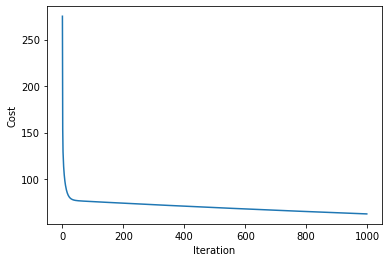

In [137]:
plt.plot(costs)
plt.xlabel('Iteration'), plt.ylabel('Cost')
plt.show()

In [118]:
w

array([-6.1394e+07, -2.8305e+08, -6.0785e+08, -7.3389e+08, -4.1556e+06,
       -3.4782e+07, -3.8273e+08, -4.3359e+09, -2.2420e+08, -6.6954e+08,
       -2.6808e+10, -1.1447e+09, -2.1785e+10, -8.1433e+08])

In [143]:
from sklearn.preprocessing import StandardScaler


In [164]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_train_data = scaler.transform(x_train)
scaled_test_data = scaler.transform(x_test)

In [165]:
w, costs = gradient_descent(scaled_train_data[:, :13], y_train, .01, 5000)

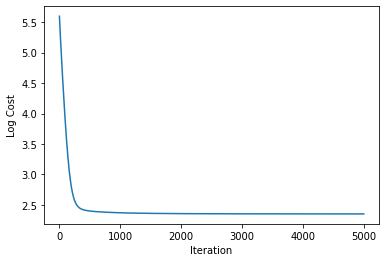

In [166]:
plt.plot(np.log(costs))
plt.ylabel('Log Cost')
plt.xlabel('Iteration')
plt.show()

In [170]:
np.sum((np.c_[np.ones(x_test.shape[0]), scaled_test_data] @ w - y_test)**2) / y_test.shape[0]

25.937310550571755

In [171]:
y_test

array([50. , 16.1, 43.8, 26.6, 36.1, 21.8, 29.9, 50. , 44. , 20.6, 19.6,
       28.4, 19.1, 22.3, 20.9, 28.4, 14.4, 32.7, 13.8,  8.5, 22.5, 35.1,
       31.6, 17.8, 15.6, 20.7, 39.8, 17.8, 19.6, 14.9, 22. , 48.8, 25. ,
       48.5, 23.9, 20.3, 15.2, 10.5, 19. , 16.4,  8.8, 22. , 24.8, 50. ,
       19.3, 22.7, 37.3, 31.6,  8.3, 23.1, 50. , 13.9, 16.1, 25.3, 19.5,
       10.2, 19.9, 35.2, 13.4, 24.7, 11.5, 23.4, 16.7, 15.4, 18. , 28.5,
       18.4, 32.5, 50. , 50. , 19.6, 17.6, 42.3, 14.5, 13.2, 16.2, 29.6,
       16.7, 13. , 22.3, 13.4,  5. , 19.5, 14.6, 22. ,  8.1, 24.6, 33.2,
       20.6, 14.1, 14.1, 21.1, 30.3, 23.7, 21.4, 18.3,  8.5, 22.8, 22.8,
       22.2, 13.9, 25. , 18.5,  7. , 22.6, 20.1, 30.8, 31.1, 23.8, 12.5,
       23.6, 23.2, 24.2, 22.2, 27.9, 22.2, 33.1, 19.3, 18.9, 22.6, 50. ,
       24.8, 18.5, 36.4, 19.2, 16.6, 23.1])

In [172]:
np.c_[np.ones(x_test.shape[0]), scaled_test_data] @ w

array([23.12  , 21.6259, 34.8548, 22.3259, 33.1269, 20.3757, 31.1352,
       30.5515, 36.7996, 26.9059, 22.6528, 28.6068, 16.8567, 26.0897,
       21.1292, 30.6725, 10.1337, 30.1108,  6.0103, 15.8836, 18.3279,
       35.1624, 32.2622,  9.2979, 11.5564, 22.3586, 34.6125, 17.9135,
       18.9877, 15.6154, 25.9333, 39.9616, 25.4067, 41.033 , 25.1451,
       22.7845, 10.7258, 12.3552, 14.8236, 18.8404,  3.4304, 27.276 ,
       26.1669, 39.9558, 20.4418, 20.43  , 33.8657, 32.622 , 10.4126,
       25.1304, 42.1484, 17.3141, 18.1343, 25.7641, 18.3936,  6.3609,
       19.8845, 34.1998, 16.8092, 23.2051, 13.8181, 24.5085, 19.1558,
       17.5456, 18.4907, 32.9252, 19.8355, 30.9768, 32.4049, 39.5259,
       17.5862, 17.038 , 35.9746, 18.3736,  9.7202, 14.8594, 25.0685,
       20.1196, 16.9425, 27.2418, 13.6716,  6.4135, 19.3084,  8.064 ,
       27.1047,  2.9564, 28.9413, 32.0491, 22.7635, 17.0644, 18.9038,
       21.394 , 31.9214, 27.6327, 19.9486, 20.1198,  7.3524, 27.6084,
       24.9744, 22.9